In [1]:
import os
import cv2
import numpy as np
import glob
import re
import matplotlib.pyplot as plt
import mediapipe
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
DATASET_ROOT = "/home/nipun/Pictures/AnnotEyes"

In [3]:
TEXT_FILES = sorted(glob.glob(f"{os.path.join(DATASET_ROOT,'labels')}/*"))

saved_dir  = "./CustomEyeDataset"

if not os.path.exists(saved_dir):
    os.makedirs(saved_dir)


In [ ]:
count = 0

all_metadata = []

df = pd.DataFrame(columns=['image_id','x1','y1'])
for text_file in TEXT_FILES:
    
    
    eye_details = irisSplitted(text_file,saved_dir)
    
    for j in eye_details:
        all_metadata.append(j)
    # count +=1
    # if count ==1:
    #     break
    

In [ ]:

df = pd.DataFrame(columns=['image_id','x1','y1'])
for i in all_metadata:
    df = df.append(i
                   ,ignore_index=True
                  )

In [ ]:
df = df.drop_duplicates(subset=['image_id'])

In [ ]:
df.to_csv("Training_Center_Coordinates.csv")

In [4]:



def getLandMark_Coordinates(index,image,width,height,landmarks):
    
    landmark_index = landmarks.landmark[index]
    
    return (int(landmark_index.x * width),int(landmark_index.y* height))

In [ ]:
mp_face_mesh = mediapipe.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

def irisSplitted(file_name,save_location):
    with open(file_name, 'r') as f:
        data  = f.readlines()
        
    data_info = [re.split(r'\t',i.rstrip("\n")) for i in data]
    
    
    # df = pd.DataFrame(columns=['image_id','x1','y1']) 
    resize_amt =64
    
    eye_details = []
    for metadata in data_info:
        img_file = os.path.join(DATASET_ROOT,"images",metadata[0])
        
        # print(img_file)
        
        img = cv2.imread(img_file)
        h,w = img.shape[:2]
        
        right_iris_center = metadata[3:5]
        left_iris_center = metadata[9:11]
        
        
        # print(right_iris_center)
        
        try:
            results = face_mesh.process(img)

            landmarks = results.multi_face_landmarks[0]
            
            print("Predicting!!!!")
            
            lEyeTopLeftCorner = getLandMark_Coordinates(70,img,w,h,landmarks)

            rEyeTopLeftCorner = getLandMark_Coordinates(285,img,w,h,landmarks)

            lEyeBottomRight = getLandMark_Coordinates(133,img,w,h,landmarks)

            rEyeBottomRight  = getLandMark_Coordinates(263,img,w,h,landmarks)
            
            
            
            left_eye = img[lEyeTopLeftCorner[1]:lEyeBottomRight[1]+15,lEyeTopLeftCorner[0]:lEyeBottomRight[0]]
            
            
            left_eye_h,left_eye_w = left_eye.shape[:2]


            right_eye = img[rEyeTopLeftCorner[1]:rEyeBottomRight[1]+15,rEyeTopLeftCorner[0]:rEyeBottomRight[0]]
            
            right_eye_h,right_eye_w = right_eye.shape[:2]
            
            lEye_Iris = [int(float(left_iris_center[0])-lEyeTopLeftCorner[0]),int(float(left_iris_center[1])-lEyeTopLeftCorner[1])]

            REye_Iris = [int(float(right_iris_center[0])-rEyeTopLeftCorner[0]),int(float(right_iris_center[1])-rEyeTopLeftCorner[1])]
            
            
            lEye_Iris[0] = (lEye_Iris[0]/left_eye_w) * resize_amt
            lEye_Iris[1] = (lEye_Iris[1]/left_eye_h) * resize_amt
            
            
            REye_Iris[0] = (REye_Iris[0]/right_eye_w) * resize_amt
            REye_Iris[1] = (REye_Iris[1]/right_eye_h) * resize_amt
            
            
            left_eye = cv2.resize(left_eye,(resize_amt,resize_amt))
            
            right_eye = cv2.resize(right_eye,(resize_amt,resize_amt))
            
            
            l_name = metadata[0].split(".")[0] +"_" +"left" +".png"
            
            r_name = metadata[0].split(".")[0] +"_" +"right" +".png"
            
            
            cv2.imwrite(os.path.join(save_location,l_name),left_eye)
            cv2.imwrite(os.path.join(save_location,r_name),right_eye)
            
            
            l_dic = {'image_id': l_name,
                        'x1': lEye_Iris[0],
                        'y1': lEye_Iris[1],
                    }
            
            r_dic = {'image_id': r_name,
                        'x1': REye_Iris[0],
                        'y1': REye_Iris[1],
                    }
            
            eye_details.append(l_dic)
            eye_details.append(r_dic)
        except  Exception as e:
            print(f"{e} has raised as an exception")
            print(img_file)
            continue
            
            
    
    return eye_details
        
        
        
        
                
        
        
    
#     img_file = os.path.join(DATASET_ROOT,"images",data_info[0])

In [ ]:
df.to_csv("Training_Center.csv")

# Eye Cropping from Single Directory

In [5]:
DATASET_ROOT = "/home/nipun/Pictures/AnnotEyes"

In [16]:
saved_dir  = "./CustomEyeDataset"

if not os.path.exists(saved_dir):
    os.makedirs(saved_dir)

In [9]:
mp_face_mesh = mediapipe.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

In [14]:
def getLandMark_Coordinates(index,image,landmarks):
    
    landmark_index = landmarks.landmark[index]
    
    return (int(landmark_index.x * image.shape[1]),int(landmark_index.y* image.shape[0]))

In [21]:
count = 0
for file_name in os.scandir(DATASET_ROOT):
    
    print(file_name.path)
    
    file_base_name = file_name.path.split("/")[-1].split(".")[0]
    
    img_base= cv2.imread(file_name.path)
    
    results = face_mesh.process(img_base)
    
    print(results.multi_face_landmarks)
    
    
    landmarks = results.multi_face_landmarks[0]
    
    img_landmark = img_base.copy()

    lEyeTopLeftCorner = getLandMark_Coordinates(70,img_base,landmarks)

    rEyeTopLeftCorner = getLandMark_Coordinates(285,img_base,landmarks)

    lEyeBottomRight = getLandMark_Coordinates(133,img_base,landmarks)

    rEyeBottomRight  = getLandMark_Coordinates(263,img_base,landmarks)
    
    left_eye = img_base[lEyeTopLeftCorner[1]:lEyeBottomRight[1]+30,lEyeTopLeftCorner[0]:lEyeBottomRight[0]]
    
    right_eye = img_base[rEyeTopLeftCorner[1]:rEyeBottomRight[1]+30,rEyeTopLeftCorner[0]:rEyeBottomRight[0]]


    cv2.imwrite(os.path.join(saved_dir,file_base_name+"left"+".png"),left_eye)
    cv2.imwrite(os.path.join(saved_dir,file_base_name+"right"+".png"),right_eye)
    
    
    # if count ==0:
    #     break

/home/nipun/Pictures/AnnotEyes/my_eye.png
[landmark {
  x: 0.508560061454773
  y: 0.7280434370040894
  z: -0.04422472417354584
}
landmark {
  x: 0.5091939568519592
  y: 0.6491177678108215
  z: -0.07878024876117706
}
landmark {
  x: 0.5086681842803955
  y: 0.6745592355728149
  z: -0.04328170418739319
}
landmark {
  x: 0.49723437428474426
  y: 0.5745137333869934
  z: -0.056403812021017075
}
landmark {
  x: 0.5094844102859497
  y: 0.6253145933151245
  z: -0.0829361155629158
}
landmark {
  x: 0.5096469521522522
  y: 0.5951679944992065
  z: -0.07601520419120789
}
landmark {
  x: 0.5101290941238403
  y: 0.5260242223739624
  z: -0.03340920805931091
}
landmark {
  x: 0.4073001742362976
  y: 0.5262158513069153
  z: 0.022710004821419716
}
landmark {
  x: 0.5104857683181763
  y: 0.47850537300109863
  z: -0.02092777192592621
}
landmark {
  x: 0.5108801126480103
  y: 0.4495479464530945
  z: -0.02229238487780094
}
landmark {
  x: 0.5115076899528503
  y: 0.3475811779499054
  z: -5.335181049304083e-05

# Model Feature Extraction

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
import hpe
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import numpy as np
import os
from torch.utils.data import Dataset
import torch
from PIL import Image
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import albumentations as A
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm
from glob import glob
import segmentation_models_pytorch as smp
import torch.nn.functional as F
import cv2
import time 
import mediapipe
from torchvision import transforms
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import albumentations as A
from albumentations.pytorch import ToTensorV2
import glob
from torchvision.models.feature_extraction import create_feature_extractor
device =torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [2]:
# class CustomTensorDataset(Dataset):
#     def __init__(self,tensors,transforms = None):
#         self.tensors = tensors 
#         self.transforms = transforms
#     def __len__(self):
#         return self.tensors[0].size(0)
    
#     def __getitem__(self,index):
#         image = self.tensors[0][index]
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         print(image.size())
#         coords = self.tensors[1][index]
#         if self.transforms is not None:
#             image = self.transforms(image)
            
#         return (img,coords)

In [3]:
resize_amt = 64


In [2]:

train_transforms =  A.Compose([
    A.Resize(width=64,height=64),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(p=1)
])

val_transforms =  A.Compose([
    A.Resize(width=64,height=64),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(p=1)
])



# Withough Flattenning 

In [5]:

class ObjectDetector(nn.Module):
    def __init__(self):
        super(ObjectDetector, self).__init__()
        self.model = get_model()
        
        self.node_name = "stage1d.rebnconvin.conv_s1"

        return_nodes = [self.node_name]
        self.feat_ext = create_feature_extractor(self.model,return_nodes=return_nodes)
        
        self.regressor = nn.Sequential(nn.Linear(64,32),
                                       nn.ReLU(),
                                       nn.Linear(32,16),
                                       nn.ReLU(),
                                       nn.Linear(16,2),
                                       nn.Sigmoid())
        
    def forward(self,x):
        
        features = self.feat_ext(x) # --> [1,64,64,64]
        # print(features[self.node_name].size())
        bboxes = self.regressor(features[self.node_name])
        
        
        return bboxes

# Fully Convolutional

In [6]:
class ObjectDetector(nn.Module):
    def __init__(self):
        super(ObjectDetector, self).__init__()
        self.model = get_model()
        
        self.node_name = "stage1d.rebnconvin.conv_s1"

        return_nodes = [self.node_name]
        self.feat_ext = create_feature_extractor(self.model,return_nodes=return_nodes)
        
        
        self.conv_1 = nn.Conv2d(in_channels=64,out_channels=32,kernel_size=64)
        
        
        self.conv_2 = nn.Conv2d(in_channels=32,out_channels=16,kernel_size=1)
        
        self.conv_3 = nn.Conv2d(in_channels=16,out_channels=2,kernel_size=1)
        
        
        self.act = nn.Sigmoid()
        # self.regressor = nn.Sequential(nn.Linear(64,32),
        #                                nn.ReLU(),
        #                                nn.Linear(32,16),
        #                                nn.ReLU(),
        #                                nn.Linear(16,2),
        #                                nn.Sigmoid())
        
    def forward(self,x):
        
        features = self.feat_ext(x) # --> [1,64,64,64]
        
        feat_1  = self.conv_1(features[self.node_name])
        
        
        feat_2 = self.conv_2(feat_1)
        
        
        feat_3 = self.conv_3(feat_2)[:,:,-1,-1]
        
        
        
        return self.act(feat_3)

In [10]:
model = ObjectDetector()

model.to(device)

rand_tensor = torch.randn((1,3,64,64
                           
                           )).to(device)

output = model(rand_tensor)

print(output.shape)

/home/nipun/mambaforge/envs/LuminEye/lib/python3.10/site-packages/torch/nn/functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


torch.Size([1, 2])


In [7]:
def get_model():
        
    model_U = torch.load("/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/U2net/Miche_model_2023_04_11_22:14:26_val_iou0.900.pt")
    
    model_U.eval()
    
    
    return model_U


# model_U.eval()

In [9]:
# model_output,_,_,_,_,_,d_6 = model_U(image)

In [8]:
IMAGE_ROOT = "./CenterEyeDatasets"

In [9]:
df = pd.read_csv("Training_Center_Coordinates.csv")

In [10]:
trn_ids, val_ids = train_test_split(df.image_id.unique(), test_size=0.1, random_state=99)
trn_df, val_df = df[df['image_id'].isin(trn_ids)], df[df['image_id'].isin(val_ids)]
print(len(trn_df))
print(len(val_df))

2196
244


In [12]:
class OpenDataset(torch.utils.data.Dataset):

    def __init__(self, df, image_dir=IMAGE_ROOT, transforms=None):
        self.image_dir = image_dir

        self.files = glob.glob(self.image_dir+'/*')

        self.df = df
        self.image_infos = df.image_id.unique()
        self.transforms = transforms

    def __getitem__(self, ix):

        image_id = self.image_infos[ix]

        # print(image_id)

        img_path = os.path.join(self.image_dir, image_id)

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # img = img/255.0

        original_height = img.shape[0]
        original_width = img.shape[1]
        
        data = df[df['image_id'] == image_id]
        
        
        x1 = data["x1"].values[0]/original_width
        y1 = data["y1"].values[0]/original_height

        # print(data["x1"].values[0])

        # data = data[['x1', 'y1']].values
        
        bbox = [[x1,y1]]


        # print(bbox)
        # print(data[0])
       
        if self.transforms:

            transformed = self.transforms(
                image=img)

            image = transformed['image']
            
        boxes= torch.Tensor(bbox)
        
    
        # return image
        return image,boxes

    def collate_fn(self, batch):
        return tuple(zip(*batch))

    def __len__(self):
        return len(self.image_infos)

In [13]:
train_ds = OpenDataset(trn_df,transforms=train_transforms)
test_ds = OpenDataset(val_df,transforms=val_transforms)

In [15]:
img,box = train_ds[1]




In [16]:
trainLoader = DataLoader(train_ds, batch_size=4,
	shuffle=True, num_workers=os.cpu_count(), pin_memory=True)
testLoader = DataLoader(test_ds, batch_size=4,
	num_workers=os.cpu_count(), pin_memory=True)

In [17]:
# model = get_model()

In [18]:
# from torchvision.models.feature_extraction import get_graph_node_names
# train_nodes, eval_nodes = get_graph_node_names(model)


# node_name = "stage1d.rebnconvin.conv_s1"

# return_nodes = [node_name]
# feat_ext = create_feature_extractor(model,return_nodes=return_nodes)

In [19]:
# inp = feat_ext(img)

In [20]:

# node_name = "stage1d.rebnconvin.conv_s1"

# return_nodes = [node_name]
# feat_ext = create_feature_extractor(model,return_nodes=return_nodes)

In [21]:
# features = feat_ext(img)
img,box = train_ds[1]


img = img.to(device)
img = img.unsqueeze(0)
print(img.shape)
print(box.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 2])


In [22]:
# output = feat_ext(img)

# print(output[node_name].size())

# # adaptive_pooling = nn.AdaptiveAvgPool2d((,6))

# print(adaptive_pooling(output[node_name]).size())

# flattern = nn.Flatten()



# print(flattern(output[node_name]).size())

In [23]:
box_detector = ObjectDetector().to(device)

/home/nipun/mambaforge/envs/LuminEye/lib/python3.10/site-packages/torch/nn/functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [24]:
# output = box_detector(img)


box_detector.train()

ObjectDetector(
  (model): U2NET(
    (stage1): RSU7(
      (rebnconvin): REBNCONV(
        (conv_s1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_s1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_s1): ReLU(inplace=True)
      )
      (rebnconv1): REBNCONV(
        (conv_s1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_s1): ReLU(inplace=True)
      )
      (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
      (rebnconv2): REBNCONV(
        (conv_s1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_s1): ReLU(inplace=True)
      )
      (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Tru

In [89]:
img = box_detector(img)

In [53]:
# print(img[-1][-1][-1].shape)


# img = img[:,-1,-1,:]
print(box_detector(img).shape)
# print(img.shape)

torch.Size([1, 2])


In [26]:
from torch.nn import MSELoss
bboxLossFunc = MSELoss()
# initialize the optimizer, compile the model, and show the model
# summary
opt = Adam(box_detector.parameters(), lr=0.001)

epochs = 30


In [27]:
for e in range(epochs):
    
    for idx,(images,coord) in enumerate(trainLoader):
        
        images = images.to(device)
        coord = coord.to(device)
        
        predictions = box_detector(images)
        
        # print(coord)
        # print(predictions)
        bbox = predictions[:,-1,-1,:].unsqueeze(1)
        
        
        print(bbox)
        bboxLoss = bboxLossFunc(bbox,coord)
        
        print(f"Bounding Box Regression Loss--> {bboxLoss.item()}")
        
        opt.zero_grad()
        bboxLoss.backward()
        opt.step()
        

tensor([[[0.5100, 0.4834]],

        [[0.5153, 0.4881]],

        [[0.5066, 0.4867]],

        [[0.5077, 0.4879]]], device='cuda:0', grad_fn=<UnsqueezeBackward0>)
Bounding Box Regression Loss--> 0.009801024571061134
tensor([[[0.5091, 0.4289]],

        [[0.5163, 0.4584]],

        [[0.4756, 0.4376]],

        [[0.4889, 0.4531]]], device='cuda:0', grad_fn=<UnsqueezeBackward0>)
Bounding Box Regression Loss--> 0.0143046323210001
tensor([[[0.5054, 0.4725]],

        [[0.5321, 0.4672]],

        [[0.5207, 0.4640]],

        [[0.5258, 0.4759]]], device='cuda:0', grad_fn=<UnsqueezeBackward0>)
Bounding Box Regression Loss--> 0.004942159168422222
tensor([[[0.5427, 0.4506]],

        [[0.5520, 0.4121]],

        [[0.5243, 0.4463]],

        [[0.5415, 0.4448]]], device='cuda:0', grad_fn=<UnsqueezeBackward0>)
Bounding Box Regression Loss--> 0.0061617279425263405
tensor([[[0.5827, 0.3352]],

        [[0.5739, 0.3614]],

        [[0.6371, 0.2771]],

        [[0.5977, 0.3655]]], device='cuda:0', grad

In [30]:
torch.save(box_detector,"CenterPrediction.pt")

In [31]:
for e in range(epochs):
    
    for idx,(images,coord) in enumerate(trainLoader):
        
        images = images.to(device)
        coord = coord.to(device)
        
        predictions = box_detector(images)
        
        # print(coord)
        # print(predictions)
        
        
        
        # print(bbox)
        bboxLoss = bboxLossFunc(predictions,coord)
        
        print(f"Bounding Box Regression Loss--> {bboxLoss.item()}")
        
        opt.zero_grad()
        bboxLoss.backward()
#         opt.step()

In [15]:
img,coord = test_ds[100]

img = img.to(device)

h,w = img.shape[1],img.shape[2]
img = img.unsqueeze(0)
print(img.shape)
print(h,w)
print(coord)





torch.Size([1, 3, 64, 64])
64 64
tensor([[0.6716, 0.5000]])


In [16]:
# Ground Truth

gt_coord = coord.numpy()

gt_coord[0][0] = gt_coord[0][0] *w

gt_coord[0][1] = gt_coord[0][1] *h
print(gt_coord)

[[42.985073 32.      ]]


In [17]:
featurs = model(img)


print(featurs.detach().cpu().numpy().shape)



AttributeError: 'ObjectDetector' object has no attribute 'conv_1'

In [74]:
box_prediction = featurs[:,-1,-1,:]

print(box_prediction)

tensor([[0.6753, 0.5061]], device='cuda:0', grad_fn=<SliceBackward0>)


In [75]:
pred_coord = box_prediction.detach().cpu().numpy()

pred_coord[0][0] = pred_coord[0][0] * w

pred_coord[0][1] = pred_coord[0][1] * h


print(pred_coord)

[[43.221455 32.38936 ]]


In [14]:
model = torch.load("/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-MainPipeLine/CenterPrediction.pt")

model.to(device)
model.eval()

ObjectDetector(
  (model): U2NET(
    (stage1): RSU7(
      (rebnconvin): REBNCONV(
        (conv_s1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_s1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_s1): ReLU(inplace=True)
      )
      (rebnconv1): REBNCONV(
        (conv_s1): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_s1): ReLU(inplace=True)
      )
      (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=True)
      (rebnconv2): REBNCONV(
        (conv_s1): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_s1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu_s1): ReLU(inplace=True)
      )
      (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Tru

# MICHE IMAGES


In [29]:
import cv2
img_path = "/home/nipun/Documents/Uni_Malta/Datasets/Datasets/Miche/train_img/001_GT2_OU_F_RI_01_1.jpg"

In [30]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

h,w = img.shape[:2]

In [31]:
transforms =  A.Compose([
    A.Resize(width=64,height=64),
    A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ToTensorV2(p=1)
])


image = transforms(image=img)

image = image["image"].to(device)

image = image.unsqueeze(0)
print(image.shape)

torch.Size([1, 3, 64, 64])


In [32]:
featurs = model(image)

In [33]:
box_prediction = featurs[:,-1,-1,:]

print(box_prediction)

tensor([[0.4067, 0.4553]], device='cuda:0', grad_fn=<SliceBackward0>)


In [34]:
pred_coord = box_prediction.detach().cpu().numpy()

pred_coord[0][0] = pred_coord[0][0] * w

pred_coord[0][1] = pred_coord[0][1] * h


print(pred_coord)

[[198.89201 147.0555 ]]


In [35]:
cv2.circle(img,(int(pred_coord[0][0]),int(pred_coord[0][1])),5,(0,255,0),2)

array([[[194, 195, 197],
        [196, 200, 199],
        [195, 206, 200],
        ...,
        [112, 107, 114],
        [106, 101, 108],
        [113, 105, 118]],

       [[190, 195, 199],
        [195, 203, 205],
        [196, 208, 208],
        ...,
        [119, 114, 118],
        [118, 113, 117],
        [118, 111, 118]],

       [[183, 198, 205],
        [185, 200, 207],
        [184, 198, 207],
        ...,
        [116, 113, 108],
        [116, 113, 108],
        [115, 110, 106]],

       ...,

       [[214, 216, 213],
        [213, 215, 212],
        [212, 214, 211],
        ...,
        [200, 200, 208],
        [195, 198, 205],
        [197, 200, 207]],

       [[219, 221, 218],
        [218, 220, 217],
        [217, 219, 218],
        ...,
        [198, 201, 210],
        [197, 200, 209],
        [195, 198, 207]],

       [[220, 222, 219],
        [219, 221, 218],
        [219, 221, 220],
        ...,
        [199, 202, 211],
        [198, 201, 210],
        [200, 203, 212]]

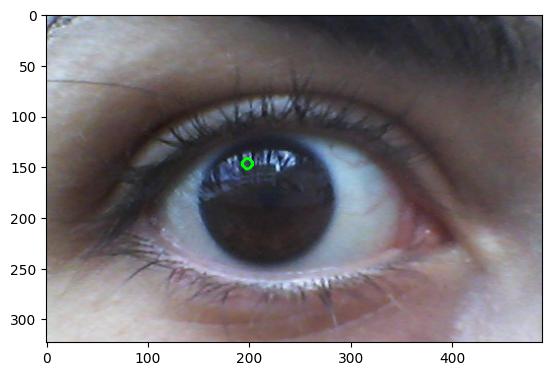

: 

In [36]:
plt.imshow(img)